<a href="https://colab.research.google.com/github/JMQuinones/DS-ML/blob/master/datasets/practica_primer_parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Practica primer parcial**
* ### **Grupo 4**

* ### **Integrantes**



>1.   Orellana Espinoza Elizabeth Margot
2.   Quiñones Vargas Jorge Mauricio
3.   Velasco Miranda Juan Pablo
4. Viza Contreras Maria Elena





## **Pre-procesamiento de datos**
* ### **Importacion y Configuracion**
Comenzamos importando los paquetes que vamos a utilizar para este ejercicio y vamos a configurar algunos valores <br>
* ### **Procesamiento de datos**
Antes de aplicar **features engineering** necesitamos pre-procesar los datos para obtener un analisis adecuado<br>
Para el conjunto de datos necesitaremos:


>1.   **Cargar** el conjunto de datos
2.   **Limpiar** los datos para corregir cualquier error o inconsistencia
3.   **Codificar** el tipo de dato estadistico(numerico o categorico)
4.   **Imputar** los valores faltantes




In [1]:
# Importar los paquetes necesarios
import pandas as pd
import numpy as np

#Importar matplotlib y seaborn - para graficacion
import matplotlib.pyplot as plt
import seaborn as sns

#Importar sklearn - Machine Learning Tradicional
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Importar de sklearn Metricas y Scoring de Regresion
from sklearn import metrics
from sklearn.metrics import r2_score

## **1. Cargar datos**

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/JMQuinones/DS-ML/master/datasets/heart_cleaned.csv',encoding = "ISO-8859-1")

In [4]:
# Vamos visualizar los datos
data.head(50)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


## **2. Limpiar datos**

In [ ]:
# Vamos a crear un funcion para limpiar las cabeceras del dataset

def format_column_names(df):
    df.columns = df.columns.str.lower().str.replace(" ","_", regex=True)
    df.columns = df.columns.str.replace(".","_", regex=True)
    df.columns = df.columns.str.replace("-","_", regex=True)
    df.columns = df.columns.str.replace(":","_", regex=True)

In [ ]:
format_column_names(data)
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
data["present_year"]=2022
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,present_year,age
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,2022,15
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,2022,15
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,2022,10
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,2022,5
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2022,8


In [ ]:
data["age"] = data["present_year"] - data["year"]
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,present_year,age
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,2022,15
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,2022,15
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,2022,10
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,2022,5
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2022,8


In [ ]:
data.drop(['year', 'present_year', 'name'], axis=1, inplace=True)
data.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,60000,70000,Petrol,Individual,Manual,First Owner,15
1,135000,50000,Petrol,Individual,Manual,First Owner,15
2,600000,100000,Diesel,Individual,Manual,First Owner,10
3,250000,46000,Petrol,Individual,Manual,First Owner,5
4,450000,141000,Diesel,Individual,Manual,Second Owner,8


## **3. Codificar datos**

In [ ]:
# Se verifica que columnas tienen variables categoricas
cat_cols = [col for col in data.columns if data[col].dtype == 'O']
cat_cols

['fuel', 'seller_type', 'transmission', 'owner']

In [ ]:
# Se verifica que columnas tienen variables continuas
con_cols = [col for col in data.columns if data[col].dtype != 'O']
con_cols

['selling_price', 'km_driven', 'age']

In [ ]:
col_categorical = [var for var in data.columns if data[var].dtype=='O']
for i in col_categorical:
    print(f"{i}: {len(data[i].unique())} labels")

fuel: 5 labels
seller_type: 3 labels
transmission: 2 labels
owner: 5 labels


In [ ]:
# Ejemplo: obtener los diferentes valores de la columna Type
data['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [ ]:
data.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,60000,70000,Petrol,Individual,Manual,First Owner,15
1,135000,50000,Petrol,Individual,Manual,First Owner,15
2,600000,100000,Diesel,Individual,Manual,First Owner,10
3,250000,46000,Petrol,Individual,Manual,First Owner,5
4,450000,141000,Diesel,Individual,Manual,Second Owner,8


In [ ]:
# Funcion para convertir los datos categoricos a continuos
def col_cat_con(cat_colums ,df):
    for i in cat_colums :
        df[i] = df[i].astype('category').cat.codes

In [ ]:
col_cat_con(col_categorical,data)
data.head(30)

,selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,60000,70000,4,1,1,0,15
1,135000,50000,4,1,1,0,15
2,600000,100000,1,1,1,0,10
3,250000,46000,4,1,1,0,5
4,450000,141000,1,1,1,2,8
5,140000,125000,4,1,1,0,15
6,550000,25000,4,1,1,0,6
7,240000,60000,4,1,1,2,8
8,850000,25000,4,1,1,0,7
9,365000,78000,0,1,1,0,5


In [ ]:
data.corr()

,selling_price,km_driven,fuel,seller_type,transmission,owner,age
selling_price,1.000000,-0.192289,-0.269653,-0.151554,-0.530205,-0.207840,-0.413922
km_driven,-0.192289,1.000000,-0.286095,0.113689,0.120226,0.297115,0.419688
fuel,-0.269653,-0.286095,1.000000,0.038797,0.039249,-0.010910,0.120002
seller_type,-0.151554,0.113689,0.038797,1.000000,0.174925,0.165681,0.098352
transmission,-0.530205,0.120226,0.039249,0.174925,1.000000,0.078893,0.143800
owner,-0.207840,0.297115,-0.010910,0.165681,0.078893,1.000000,0.414705
age,-0.413922,0.419688,0.120002,0.098352,0.143800,0.414705,1.000000


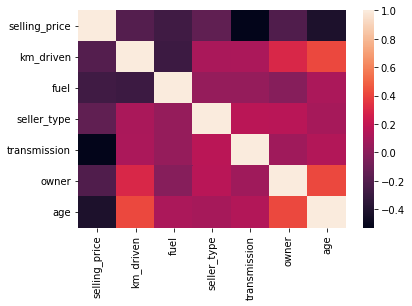

In [ ]:
sns.heatmap(data.corr())
plt.show()

In [ ]:
data.corr()['selling_price']

selling_price    1.000000
km_driven       -0.192289
fuel            -0.269653
seller_type     -0.151554
transmission    -0.530205
owner           -0.207840
age             -0.413922
Name: selling_price, dtype: float64

## **4. Imputar datos**
Para este no tenemos datos faltantes.

## **Paso 2**
* ### **Preparar el Conjunto de Datos**

* ### **Dividir el Conjunto de Datos**
Necesitamos dividir nuestros datos en dos partes

1.   Para el entramiento del modelo
2.   Para las pruebas del modelo 




In [ ]:
data.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,60000,70000,4,1,1,0,15
1,135000,50000,4,1,1,0,15
2,600000,100000,1,1,1,0,10
3,250000,46000,4,1,1,0,5
4,450000,141000,1,1,1,2,8


In [ ]:
x = data.drop(['selling_price'], axis = 1)
y = data['selling_price']

In [ ]:
x

,km_driven,fuel,seller_type,transmission,owner,age
0,70000,4,1,1,0,15
1,50000,4,1,1,0,15
2,100000,1,1,1,0,10
3,46000,4,1,1,0,5
4,141000,1,1,1,2,8
...,...,...,...,...,...,...
4335,80000,1,1,1,2,8
4336,80000,1,1,1,2,8
4337,83000,4,1,1,2,13
4338,90000,1,1,1,0,6


In [ ]:
y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 1)

In [ ]:
x_test

,km_driven,fuel,seller_type,transmission,owner,age
2761,15000,1,1,1,0,3
3210,70000,1,1,1,2,8
2606,90000,1,1,1,0,10
1030,41000,4,0,1,0,6
3942,71318,1,0,1,0,8
...,...,...,...,...,...,...
1206,80000,4,1,1,2,11
3167,90000,1,1,1,2,9
1297,60000,1,1,1,4,13
2188,66521,4,2,1,0,7


## **Paso 4**
* ### **Entrenar el Modelo**

* ### **Hacer las Predicciones**


In [ ]:
regressor = LinearRegression()

In [ ]:
model = regressor.fit(x_train, y_train)

In [ ]:
y_pred = regressor.predict(x_test)

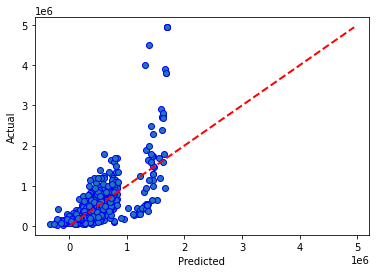

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

Text(0.5, 1.0, 'Predicted vs Actual values')

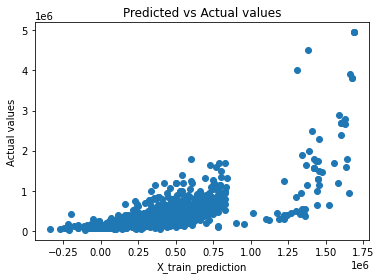

In [ ]:
# visualize actual and predicted values on test data
plt.scatter(y_pred,y_test)
plt.xlabel('X_train_prediction')
plt.ylabel('Actual values')
plt.title('Predicted vs Actual values')

## **Paso 5**
* ### **Metricas de Regresion**


>1.   **Mean Absolute Error** <br>
El error absoluto medio (MAE) es una de las métricas más comunes que se utiliza para calcular el error de predicción del modelo.
MAE viene dado por la siguiente fórmula: <br>
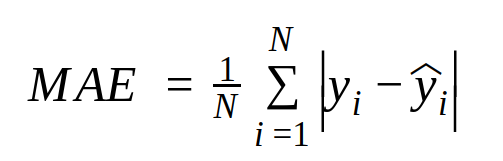
>2.   **Mean Squared Error**<br>
El error cuadrático medio (MSE) toma la diferencia cuadrática media entre el objetivo y los valores predichos. Este valor se usa ampliamente para muchos problemas de regresión y los errores más grandes tienen contribuciones cuadráticas correspondientemente más grandes al error medio. <br>
MSE viene dado por la siguiente fórmula:<br>
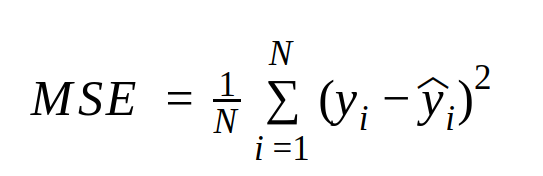
>3.   **R2 Score**<br>
La puntuación R^2 determina qué tan bien las predicciones de regresión se aproximan a los puntos de datos reales.<br>
El valor de R^2 se calcula con la siguiente fórmula:<br>
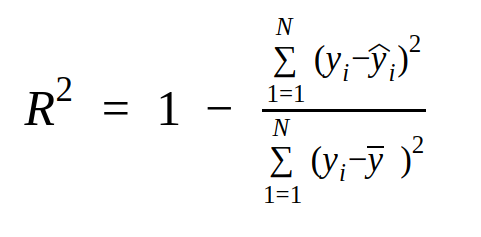


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 Score:', (metrics.r2_score(y_test, y_pred)))

Mean Absolute Error: 220522.48930095558
Mean Squared Error: 151889641107.03452
R2 Score: 0.49830981714777667


In [ ]:
print(regressor.coef_)
print(regressor.intercept_)

[-1.06096158e+00 -9.70324481e+04 -1.71020167e+04 -8.62646658e+05
 -1.71462915e+04 -3.51090057e+04]
1924461.6780209052


In [ ]:
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
km_driven,-1.060962
fuel,-97032.448132
seller_type,-17102.016650
transmission,-862646.657928
owner,-17146.291486
age,-35109.005741


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
2761,675000,826439.114333
3210,450000,558248.615553
2606,390000,501103.955369
1030,239000,419531.768189
3942,665000,608244.867808
...,...,...
1206,195000,151214.638098
3167,220000,501920.378138
1297,185000,359020.619714
2188,775000,323141.928570
